In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gaitFunctions
import combineClips
import plotClip
import os
import glob
import seaborn as sns
from scipy import stats
import cv2

def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

In [2]:
# plot colors and parameters
axis_fontsize=11
tick_fontsize=9

# colors for step kinematics
stance_color = '#5656ff'
swing_color = '#e1e813'
duty_color = '#4d4d4d'
ipsi_color = 'tab:red'
contra_color = 'tab:green'
mcl_color = 'tab:orange'

# colors for legs
first_pair_color = '#bc272d' # red
first_pair_color_alt = '#f77276' # salmon
second_pair_color = '#50a9d4' # teal
second_pair_color_alt = '#95dafc' # sky blue
third_pair_color = '#fa9805' # orange
third_pair_color_alt = '#e9c716' # gold
rear_leg_color = '#a665c9'# violet
rear_leg_color_alt = '#0000a2' # indigo

# scatter marker size and alpha
marker_size = 10
marker_alpha = 0.7
marker_color = 'k'

# Get timing of original videos (can skip down to load data)

In [3]:
# # navigate to directory that contains the data
# os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/videos_exemplaris/')
# # list directories within this directory
# dirs = []
# for dirname, dirnames, filenames in os.walk('.'):
#     # print path to all subdirectories first.
#     for subdirname in dirnames:
#         folder = os.path.join(dirname, subdirname).split('/')[1]
#         if folder not in dirs:
#             dirs.append(folder)
# dirs = np.sort(np.unique(np.array(dirs)))
# dirs = [x for x in dirs if 'exemplaris' in x]
# folders_in_analysis = gaitFunctions.selectMultipleFromList(dirs) 

In [4]:
# # get durations of videos (in seconds)
# # if there is a 'vid_info.csv' file already, then great!
# # if not, we need to make this file ... and the videos need to be downloaded on the hard drive
# # (if they are in the cloud, this will freeze)

# vids = []
# video_folder = 'original_videos'
# vid_info_file = 'vid_info.csv'
# vid_df = pd.DataFrame()

# for folder in folders_in_analysis:
#     vids_in_folder = []
#     have_vid_info = False
    
#     # collect names of videos in this folder
#     for extension in ['*mp4','*mov']:
#         vids_in_folder.extend(glob.glob(os.path.join(folder,video_folder,extension)))
    
#     # add names of videos in this folder to overall list
#     vids_in_folder = sorted(vids_in_folder)
#     vids.extend(vids_in_folder)
    
#     # do we already have vid info for this folder?
#     vid_info_path = os.path.join(folder,video_folder,vid_info_file)
#     if len(glob.glob(vid_info_path)) > 0:  
        
#         these_vids_df = pd.read_csv(vid_info_path)
#         have_vid_info = True
#         print('Found vid info in ' + folder)
#         if len(vid_df) > 0:
#             vid_df = pd.concat([vid_df, these_vids_df])
#         else:
#             vid_df = these_vids_df
            
#     if have_vid_info == False:
#         print('We need vid info for ' + folder)
#         vid_names = []
#         fps = []
#         width = []
#         height = []
#         frames = []
#         duration = []
#         for vid in vids_in_folder:
#             parent_dir, original_video_dir, vid_name = vid.split('/')
#             vid_names.append(vid_name)
# #             print(vid_name) # testing OK
#             cap = cv2.VideoCapture(vid)
#             frames_per_sec = cap.get(cv2.CAP_PROP_FPS)
#             fps.append(frames_per_sec)
#             width.append(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#             height.append(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#             totalNoFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
#             frames.append(totalNoFrames)
#             duration.append(totalNoFrames / frames_per_sec)
#             cap.release()

#         vid_info_dict = {
#             'Video File':vid_names,
#             'fps':fps,
#             'width':width,
#             'height':height,
#             'frames':frames,
#             'duration':duration
#         }
#         these_vids_df = pd.DataFrame(vid_info_dict)
        
#         if len(vid_df) > 0:
#             vid_df = pd.concat([vid_df, these_vids_df])
#         else:
#             vid_df = these_vids_df

#         # save dataFrame to csv
#         these_vids_df.to_csv(os.path.join(folder,video_folder,vid_info_file), index=False)

# num_videos = len(vids)
# vid_files = sorted(vids)
# print()
# print('Total number of videos: ' + str(num_videos)) 
# print('Mean video length: ' + meanstdstr(vid_df.duration.values) + ' seconds')
# vid_df.head(3)

# Combine data from folders ... (OR see below)

In [5]:
# # combine data from these folders into dataframes ... takes awhile
# this_treatment = 'exemplaris'
# current_dir = os.getcwd()

# path_summaries_df = pd.DataFrame()
# step_timing_combined_df = pd.DataFrame()
# step_summaries_df = pd.DataFrame()
# gait_summaries_df = pd.DataFrame()
# gait_styles_speeds_df = pd.DataFrame()

# def combineDF(original,new):
#     if len(original) == 0:
#         original = new
#     else:
#         new = pd.concat([original, new])
#     return new

# for folder in folders_in_analysis:
#     os.chdir(folder)
#     print('Getting data from ' + folder)
#     pdf, stcdf, sdf, gdf, gssdf = combineClips.main(False)
#     os.chdir(current_dir)
#     path_summaries_df = combineDF(path_summaries_df, pdf)
#     step_timing_combined_df = combineDF(step_timing_combined_df, stcdf)
#     step_summaries_df = combineDF(step_summaries_df, sdf)
#     gait_summaries_df = combineDF(gait_summaries_df, gdf)
#     gait_styles_speeds_df = combineDF(gait_styles_speeds_df, gssdf)
    
# path_summaries_df['treatment'] = [this_treatment] * len(path_summaries_df)
# step_summaries_df['treatment'] = [this_treatment] * len(step_summaries_df)
# gait_summaries_df['treatment'] = [this_treatment] * len(gait_summaries_df)

In [6]:
# print('Mean duration analyzed: ' + meanstdstr(path_summaries_df['Duration analyzed (sec)'].values) + ' seconds')
# print('Mean tardigrade length: ' + meanstdstr(path_summaries_df['Body Length (mm)'].values*1000) + ' µm')
# distances = path_summaries_df['Distance traveled (mm)'].values
# lengths = path_summaries_df['Body Length (mm)'].values
# bodylengths_traveled = distances / lengths
# print('Mean bodylength traveled: ' + meanstdstr(bodylengths_traveled))

In [7]:
# # add the original video lengths to the dataframe
# # add the bodylength traveled to the dataframe
# df_cols = list(path_summaries_df.columns.values)
# path_summaries_df['Original Video Length (sec)'] = vid_df.duration.values
# path_summaries_df['Body Lengths Traveled'] = bodylengths_traveled
# path_summaries_df.head(3)

In [8]:
# # save dataframe to analysis folder for use by subsequent notebooks
# from datetime import date
# today = str(date.today())

# # navigate to directory where the combined data for treatments is stored
# os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries/')

# this_treatment = 'all_exemplaris'
# out_file = this_treatment + '_' + today + '.xlsx'

# print('\nCombining data from all clips into ' + out_file)
# with pd.ExcelWriter(out_file, engine='openpyxl') as writer: 
#     if len(path_summaries_df) > 0:
#         path_summaries_df.to_excel(writer, index=False, sheet_name='path_summaries')
#     if len(step_timing_combined_df) > 0:
#         step_timing_combined_df.to_excel(writer, index=False, sheet_name='step_timing')
#     if len(step_summaries_df) > 0:
#         step_summaries_df.to_excel(writer, index=False, sheet_name='step_summaries')
#     if len(gait_summaries_df) > 0:
#         gait_summaries_df.to_excel(writer, index=False, sheet_name='gait_summaries')
#     if len(gait_styles_speeds_df) > 0:
#         gait_styles_speeds_df.to_excel(writer, index=False, sheet_name='gait_speeds')

# ... OR load data that is already good to go

In [9]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries')
xl_files = sorted(glob.glob('*.xlsx'))
# excel_file = gaitFunctions.selectOneFromList(xl_files)
excel_file = 'all_exemplaris_2024-04-03.xlsx'

path_summaries_df = pd.read_excel(excel_file, sheet_name='path_summaries', index_col=None)
path_summaries_df.head(2)

,Identifier,treatment,individual,date,Scale (pixels in 1mm),Body Size (mm^2),Body Length (mm),Body Width (mm),Body Width/Length Ratio,Duration analyzed (sec),...,Speed (body lengths / sec cruising),Total bearing change (deg),Bearing change (deg) / sec,Bearing change (deg) / sec cruising,Number of stops,Stops / sec,Number of turns,Turns / sec,Original Video Length (sec),Body Lengths Traveled
0,iw_11dec_tardigrade01_exemplaris,exemplaris,tardigrade01,11dec,956.03,0.017560,0.265809,0.089788,0.337792,112.6362,...,0.179656,2146.3928,19.055977,16.867627,10,0.088781,4,0.035513,137.454545,19.343800
1,iw_11dec_tardigrade02_exemplaris,exemplaris,tardigrade02,11dec,956.03,0.013457,0.239711,0.073674,0.307344,110.1818,...,0.222783,1648.0518,14.957568,16.375356,11,0.099835,1,0.009076,137.545455,21.442264


Mean ± std 97.26 ± 18.67


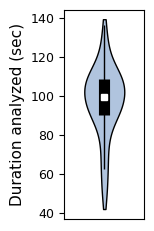

In [10]:
col = 'Duration analyzed (sec)'
data_for_col = path_summaries_df[col].values
mean_for_col = np.round(np.mean(data_for_col),2)
std_for_col = np.round(np.std(data_for_col),2)
print('Mean ± std', str(mean_for_col) + ' ± ' + str(std_for_col))

f = plt.figure(figsize=(1,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = gaitFunctions.singleViolinBox(ax,path_summaries_df,col,False)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

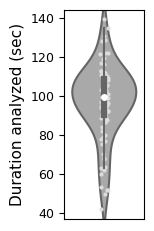

In [11]:
# try seaborn
col = 'Duration analyzed (sec)'
f = plt.figure(figsize=(1,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = gaitFunctions.singleViolinPoints(ax,path_summaries_df,col,box=True,medsize=4,
                                      pointcolor='gainsboro',vcolor='darkgray') # False if no box
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

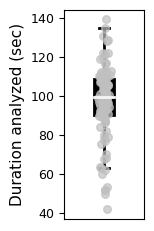

In [12]:
# boxplot with dots
f = plt.figure(figsize=(1,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = gaitFunctions.singleBoxplot(ax, path_summaries_df, 'Duration analyzed (sec)')
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

In [13]:
print(path_summaries_df.columns)

Index(['Identifier', 'treatment', 'individual', 'date',
       'Scale (pixels in 1mm)', 'Body Size (mm^2)', 'Body Length (mm)',
       'Body Width (mm)', 'Body Width/Length Ratio', 'Duration analyzed (sec)',
       'Distance traveled (mm)', 'Speed (mm/sec)',
       'Speed (body lengths / sec)', 'Percentage of time cruising',
       'Speed (mm/sec cruising)', 'Speed (body lengths / sec cruising)',
       'Total bearing change (deg)', 'Bearing change (deg) / sec',
       'Bearing change (deg) / sec cruising', 'Number of stops', 'Stops / sec',
       'Number of turns', 'Turns / sec', 'Original Video Length (sec)',
       'Body Lengths Traveled'],
      dtype='object')


In [14]:
# look for outliers in a particular column
col = 'Percentage of time cruising' # 'Body Length (mm)''
df = path_summaries_df[['Identifier',col]]
df.sort_values(by=col).head(30)

,Identifier,Percentage of time cruising
73,iw_8mar_tardigrade15_unknown,54.340278
24,iw_21dec_tardigrade05_exemplaris,58.421673
2,iw_11dec_tardigrade03_exemplaris,59.297344
54,iw_12mar_tardigrade25_exemplaris,62.773452
37,ea_19mar_tardigrade39_exemplaris,63.059452
50,iw_11mar_tardigrade21_exemplaris,66.010872
49,iw_11mar_tardigrade20_exemplaris,69.849521
95,iw_9nov_tardigrade10_exemplaris,70.215503
72,iw_8mar_tardigrade14_unknown,71.143995
82,sh_26mar_tardigrade46_unknown,72.987165


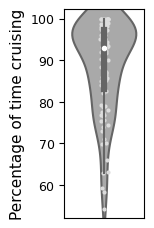

In [15]:
# show column of interest
col = 'Percentage of time cruising' # 'Body Length (mm)''
f = plt.figure(figsize=(1,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = gaitFunctions.singleViolinPoints(ax, path_summaries_df, col, box=True, medsize=3,
                                     vcolor='darkgray',pointcolor='gainsboro')
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

# Plot ALL the data 
## and record everything into a dataframe 
### (which can be formatted as a table)

In [16]:
# convert mm to micrometers
path_summaries_df['Body Size (µm^2)'] = path_summaries_df['Body Size (mm^2)'].values * 1000 * 1000
path_summaries_df['Body Length (µm)'] = path_summaries_df['Body Length (mm)'].values * 1000
path_summaries_df['Body Width (µm)'] = path_summaries_df['Body Width (mm)'].values * 1000
path_summaries_df['Speed (µm/sec)'] = path_summaries_df['Speed (mm/sec)'].values * 1000
path_summaries_df['Speed (µm/sec cruising)'] = path_summaries_df['Speed (mm/sec cruising)'].values * 1000

In [17]:
# print(path_summaries_df.columns)
columns_to_analyze = [
    'Original Video Length (sec)', 
#     'Duration analyzed (sec)',
    'Body Size (µm^2)',
    'Body Length (µm)',
    'Body Width (µm)', 
    'Body Width/Length Ratio', 
    'Distance traveled (mm)', 
    'Body Lengths Traveled',
    'Percentage of time cruising',
    'Speed (µm/sec)',
    'Speed (body lengths / sec)', 
    'Speed (µm/sec cruising)', 
    'Speed (body lengths / sec cruising)',
    #'Total bearing change (deg)', 
    'Bearing change (deg) / sec',
    'Bearing change (deg) / sec cruising', 
    #'Number of stops', 
    'Stops / sec',
    #'Number of turns', 
    'Turns / sec'
]
print(len(columns_to_analyze))

16


In [18]:
# clean up column names
collablist = [
    'Original Video Length (sec)', 
#     'Duration analyzed (sec)',
    'Body Size (µm^2)',
    'Body Length (µm)',
    'Body Width (µm)', 
    'Body Width/Length Ratio', 
    'Distance traveled (mm)', 
    'Body Lengths Traveled',
    '% sustained walking',
    'Speed (µm/sec)',
    'Speed (body lengths / sec)', 
    'Speed (µm/sec walking)', 
    'Speed (body lengths / sec walking)',
    #'Total bearing change (deg)', 
    'Bearing change (deg) / sec',
    'Bearing change (deg) / sec walking', 
    #'Number of stops', 
    'Stops / sec',
    #'Number of turns', 
    'Turns / sec'
]

collabs = dict(zip(columns_to_analyze,collablist))
# be sure we have the right labels
for k in collabs.keys():
    print(k, '-->', collabs[k])

Original Video Length (sec) --> Original Video Length (sec)
Body Size (µm^2) --> Body Size (µm^2)
Body Length (µm) --> Body Length (µm)
Body Width (µm) --> Body Width (µm)
Body Width/Length Ratio --> Body Width/Length Ratio
Distance traveled (mm) --> Distance traveled (mm)
Body Lengths Traveled --> Body Lengths Traveled
Percentage of time cruising --> % sustained walking
Speed (µm/sec) --> Speed (µm/sec)
Speed (body lengths / sec) --> Speed (body lengths / sec)
Speed (µm/sec cruising) --> Speed (µm/sec walking)
Speed (body lengths / sec cruising) --> Speed (body lengths / sec walking)
Bearing change (deg) / sec --> Bearing change (deg) / sec
Bearing change (deg) / sec cruising --> Bearing change (deg) / sec walking
Stops / sec --> Stops / sec
Turns / sec --> Turns / sec


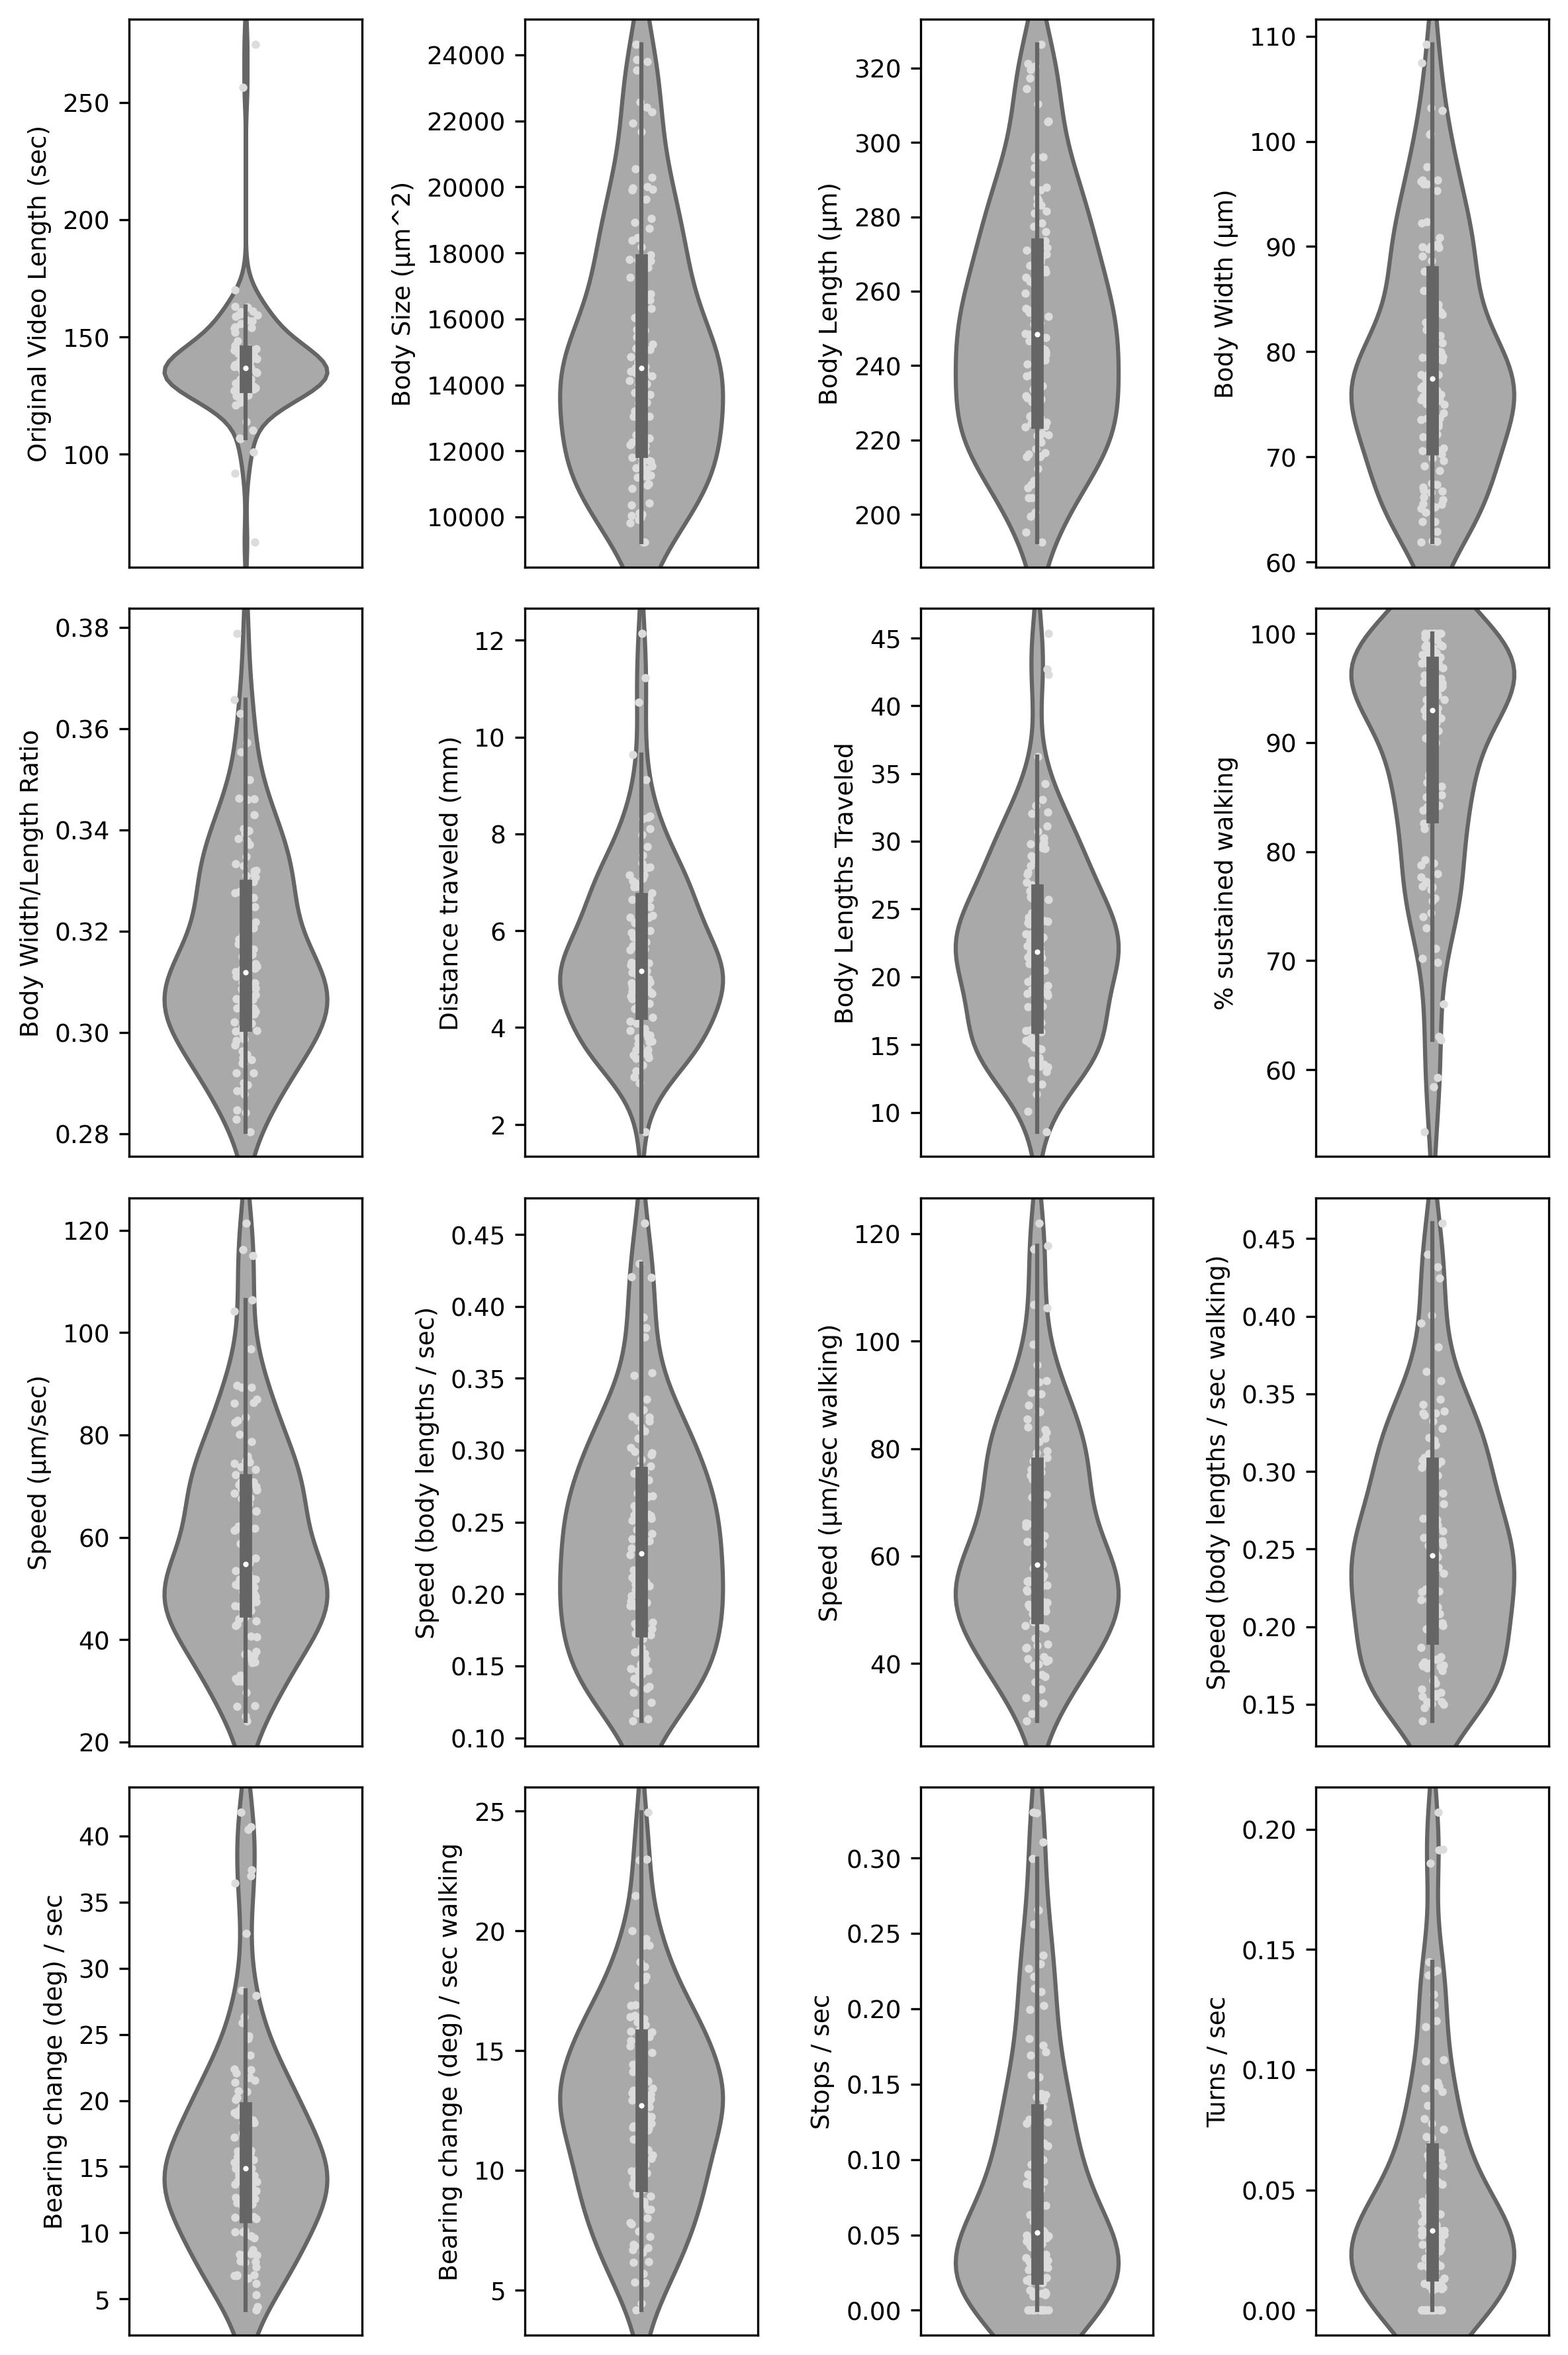

In [19]:
rows,cols = [4,4]
f,axes = plt.subplots(rows,cols,figsize = (8,12), dpi=300)
axes_list = axes.reshape(1,len(columns_to_analyze))[0]
for i, col in enumerate(columns_to_analyze):
    axes_list[i] = gaitFunctions.singleViolinPoints(axes_list[i], path_summaries_df, col, 
                                                    box=True, vwidth=0.7, #medsize=5, # medsize is not working!
                                                    vcolor='darkgray',pointcolor='gainsboro')
    axes_list[i].set_ylabel(collabs[col])
    axes_list[i].yaxis.label.set_size(tick_fontsize)
    axes_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.tight_layout()
plt.show()

In [20]:
# make a table of the data ... can screenshot this?
means = [np.round(np.mean(path_summaries_df[col].values),2) for col in columns_to_analyze]
sds = [np.round(np.std(path_summaries_df[col].values),2) for col in columns_to_analyze]
meanstd = [str(m) + ' ± ' + str(sds[i]) for i,m in enumerate(means)]
summary_df = pd.DataFrame({'Measurement':[collabs[x] for x in columns_to_analyze],
                          'Mean':means,
                          'SD':sds,
                          'Mean ± Std':meanstd})
blankIndex=[''] * len(summary_df)
summary_df.index=blankIndex
display(summary_df[['Measurement','Mean ± Std']])

,Measurement,Mean ± Std
,Original Video Length (sec),138.61 ± 23.45
,Body Size (µm^2),15081.68 ± 3753.68
,Body Length (µm),251.53 ± 32.25
,Body Width (µm),79.3 ± 11.1
,Body Width/Length Ratio,0.32 ± 0.02
,Distance traveled (mm),5.55 ± 1.81
,Body Lengths Traveled,22.25 ± 7.02
,% sustained walking,88.68 ± 10.93
,Speed (µm/sec),58.97 ± 20.7
,Speed (body lengths / sec),0.23 ± 0.08


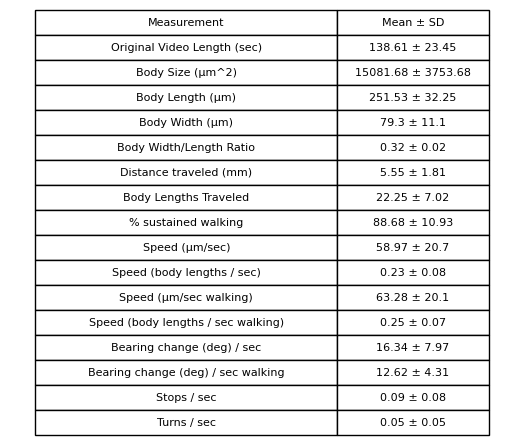

In [21]:
# table in matplotlib figure
fig,ax = plt.subplots(figsize=(6.5,4))

col_labels = [collabs[x] for x in columns_to_analyze]
table_vals = np.column_stack([np.array(col_labels), summary_df['Mean ± Std'].values])
col_labels = ['Measurement','Mean ± SD']
col_colors = ['white'] * len(col_labels)

my_table = plt.table(loc='center',
                     cellText=table_vals,
                     colWidths=[0.6,0.3],
                     rowLoc='center', # left, center, right
                     cellLoc='center',
                     colLoc='center',
                     colLabels=col_labels,
                     colColours=col_colors
                    )

my_table.scale(1, 1.5) # increase vertical space
ax.set_axis_off()
ax.axis('off')
plt.show()

In [22]:
# Table as a plotly figure
# can change colors, sizes, etc, see https://plotly.com/python/figure-factory-table/
# looks pretty good
import plotly.figure_factory as ff
fig = ff.create_table(summary_df[['Measurement','Mean ± Std']])
fig.update_layout(
    autosize=True,
    width=430,
    height=400,
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 11
fig.write_image("pathtrack_summary_table_plotly.png", scale=2)

In [40]:
# Table as an excel file ... 
out_file = 'Table_1.xlsx'
with pd.ExcelWriter(out_file, engine='openpyxl') as writer: 
    summary_df[['Measurement','Mean ± Std']].to_excel(writer, index=False, sheet_name='Table S1')

# Figures

In [24]:
'''Automated measurements of tardigrade length, width, and area were taken at each video frame'''
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries')
tardigrade = plt.imread(os.path.join('01 tracking_size','fave.png')) # or fave_with_track.png
micro = plt.imread(os.path.join('01 tracking_size','micrometer.png'))
# superimpose!
im = cv2.addWeighted(tardigrade, 0.7, micro, 0.3, 0)

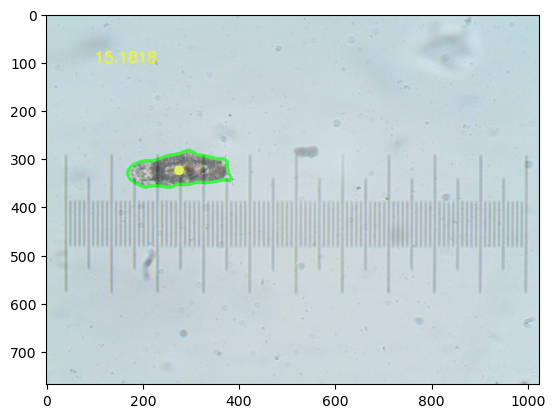

In [25]:
plt.imshow(im)
plt.show()

[4.  2.6]


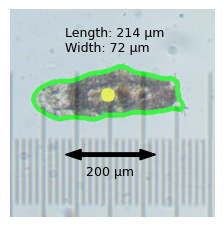

In [26]:
def tardigradeSize(ax,im):

    import matplotlib.patches as mpatches
    from matplotlib import colormaps as cm

    im_cropped = im[150:600,:] # if labeled time and whole micrometer
    # im_cropped = im[150:425,150:400]  # if just length and width

    arrow_x = 280
    arrow_y = 260
    arrow_width = 5
    dx = 65
    dy = 0

    # text for size and for scalebar
    ax.text(arrow_x - dx,110,'Length: 214 µm\nWidth: 72 µm', color='k', fontsize=tick_fontsize)
    ax.text(arrow_x-36, arrow_y+30, '200 µm', color='k', fontsize=tick_fontsize)

    # arrow for scalebar
    arrow_right = mpatches.FancyArrow(arrow_x, arrow_y, dx, dy,
                                width=arrow_width, length_includes_head=True, color='k')
    ax.add_patch(arrow_right)
    arrow_left = mpatches.FancyArrow(arrow_x, arrow_y, -dx, dy,
                                width=arrow_width, length_includes_head=True, color='k')
    ax.add_patch(arrow_left)

    # scatter 'line' and text for timeline
    # time_x = 750
    # time_dx = 150
    # time_y = 40
    # num_points = 100
    # cmap_name = 'plasma'
    # cmap = cm.get_cmap(cmap_name)
    # cols = cmap(np.linspace(0,1,num_points))
    # ax.scatter(np.linspace(time_x,time_x+time_dx,num_points),[time_y]*num_points, c=cols, s=5)
    # ax.text(time_x-90, time_y+12, 'O s', fontsize=fontsize)
    # ax.text(time_x+time_dx+5, time_y+10, '15 s', fontsize=fontsize)

    ax.axis('off')
    ax.set_xlim([135,430]) # if include whole micrometer and tracked path
    ax.set_ylim([350,50])
    ax.imshow(im_cropped)
    return ax

f=plt.figure(figsize=(4,2.6))
ax=f.add_axes([0.1,0.1,0.8,0.8])

ax = tardigradeSize(ax,im)
print(f.get_size_inches())
plt.show()

In [27]:
def scat(ax,x,y,xlab,ylab):
    r,p = stats.spearmanr(x,y)
    if p < 0.05:
        sns.regplot(ax=ax, x=x, y=y, scatter_kws={'s':marker_size,'color':marker_color}, 
                    line_kws={'color':marker_color,'linewidth':2})
    else:
        ax.scatter(x,y,s=marker_size,alpha=marker_alpha,color=marker_color)
    print('Raw p',p)
    print(xlab + ' vs. ' + ylab + ' ρ = ' + str(np.round(r,3)) +  ', p = ', str(np.round(p,3)))
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    print('n = ' + str(len(x)))
    return ax

Raw p 2.235408064559326e-39
Body Length (µm) vs. Body Width (µm) ρ = 0.905, p =  0.0
n = 103


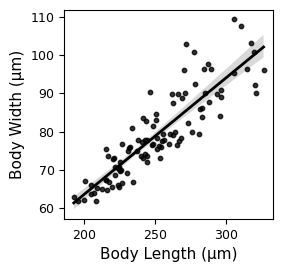

In [28]:
lengths = path_summaries_df['Body Length (mm)'].values*1000
widths = path_summaries_df['Body Width (mm)'].values*1000
xlab = 'Body Length (µm)'
ylab ='Body Width (µm)'

f = plt.figure(figsize=(2.61,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = scat(ax,lengths,widths,xlab,ylab)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

... getting first frame ...
... getting last frame ...
Last successful frame = 503


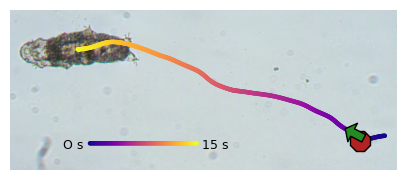

In [29]:
'''Track with Stop & Turn points'''

def trackingExample(ax,im,addSt3opsTurns=True):
    cmap_name = 'plasma'
    cmap = mpl.colormaps.get_cmap(cmap_name)

    # add color bar for timeline on separate axis
    # ax_colorbar = f.add_axes([0.9,0.2,0.02,0.6])   
    # norm = mpl.colors.Normalize(vmin=0, vmax=tracked_df.times.values[-1])
    # plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label = 'Time (sec)', cax = ax_colorbar)

    # add fake color bar for timeline
    time_x = 300
    time_dx = 200
    time_y = 500
    num_points = 100
    cols = cmap(np.linspace(0,1,num_points))
    ax.scatter(np.linspace(time_x,time_x+time_dx,num_points),[time_y]*num_points, c=cols, s=5)
    ax.text(time_x-50, time_y+10, 'O s', fontsize=tick_fontsize)
    ax.text(time_x+time_dx+10, time_y+10, '15 s', fontsize=tick_fontsize)

    # plot image of tardigrade
    # combined_frame = gaitFunctions.superImposedFirstLast(movie_file)
    # combined_frame = combined_frame
    first_frame, last_frame = gaitFunctions.getFirstLastFrames(movie_file)
    frame_to_show = last_frame
    frame_to_show = frame_to_show[:, :, [2, 1, 0]]
    ax.imshow(frame_to_show) # combined_frame or last_frame

    # plot tardigrade path
    xcoords = tracked_df.xcoords.values
    ycoords = tracked_df.ycoords.values
    smoothedx = tracked_df.smoothed_x.values
    smoothedy = tracked_df.smoothed_y.values
    cols = cmap(np.linspace(0,1,len(smoothedx)))
    # ax.scatter(xcoords, ycoords, c = 'grey', s=20) # raw data 'dimgrey' or 'black' or 'slategray'
    ax.scatter(smoothedx, smoothedy, c = cols, s=5) # smoothed data

    # add stops and turns
    if addStopsTurns:

        arrowup, arrowdown, cut_arrowup, cut_arrowdown = gaitFunctions.getArrowMarkers()
        markersize = 15
        stop_color = 'firebrick' # 'tab:red' or 'firebrick'
        turn_color = 'forestgreen' # 'limegreen' or 'tab:green' or 'green' or 'forestgreen'

        # get runs of stops ... the stop marker will be plotted in the beginning of the stop bout
        stops = tracked_df.stops.values
        stop_bouts = gaitFunctions.one_runs(stops)
        # stop_indices = [int((x[0]+x[1])/2) for x in stop_bouts] #  at middle of bout
        stop_indices = [x[0] for x in stop_bouts] # at beginning of bout
        stop_x = [smoothedx[i] for i in stop_indices]
        stop_y = [smoothedy[i] for i in stop_indices]

        # plot stops
        ax.plot(stop_x, stop_y, "8", markersize=markersize, markerfacecolor=stop_color, markeredgecolor="k")

        # get turns ... the turn marker will be plotted at the END of the turn
        turns = tracked_df.turns.values
        turn_bouts = gaitFunctions.one_runs(turns)
        turn_indices = [x[1] for x in turn_bouts]

        turn_x = [smoothedx[i] for i in turn_indices]
        turn_y = [smoothedy[i] for i in turn_indices]

        turn_directions = np.zeros(len(turn_bouts))
        for i, idx in enumerate(turn_indices):
            try:
                turn_directions[i] = np.mean(tracked_df.filtered_bearings.values[idx:idx+5])
            except:
                turn_directions[i] = tracked_df.filtered_bearings.values[idx]

        # plot turns
        for i, angle in enumerate(turn_directions):
            t = mpl.markers.MarkerStyle(marker=arrowup)
            t._transform = t.get_transform().rotate_deg(-angle)
            ax.plot(turn_x[i], turn_y[i], marker=t, markersize=markersize, markerfacecolor=turn_color, markeredgecolor="k")

    ax.set_ylim([550,250])
    ax.set_xlim([150,875])
    ax.axis('off')

    return ax
        
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries/02 tracking_path')
excel_filename = 'iw_30Jan_tardigrade01_exemplaris_037-058.xlsx'
movie_file = 'iw_30Jan_tardigrade01_exemplaris_037-058.mov'
tracked_df = pd.read_excel(excel_filename, sheet_name='pathtracking', index_col=None)

f = plt.figure(figsize=(5,2))
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
addStopsTurns = True
ax = trackingExample(ax,im,addStopsTurns)
plt.show()

Percentage Sustained Walking = 91.0


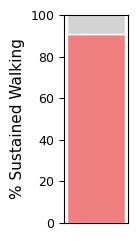

In [30]:
# add 'cruising' percentage plot
# modified from plotClip

def cruise(ax, tracked_df):
    
    stops = tracked_df.stops.values
    turns = tracked_df.turns.values
    
    non_cruising_proportion = np.count_nonzero(stops + turns) / len(stops)
    cruising_proportion = 1 - non_cruising_proportion
    
    cruising_percentage = cruising_proportion * 100
    non_cruising_percentage = 100-cruising_percentage
    
    print('Percentage Sustained Walking = ' + str(np.round(cruising_percentage,1)))
    
    cruising_color = 'lightcoral'
    
    ax.set_ylabel('% Sustained Walking', color = 'black')# cruising_color)
    ax.bar(1, cruising_percentage, bottom = 0, 
           color = cruising_color, edgecolor = 'white', width = 0.5)
    ax.bar(1, non_cruising_percentage, bottom = cruising_percentage,
           color = 'lightgray', edgecolor = 'white', width = 0.5)
    
    ax.set_xticks([])
    ax.set_ylim([0,100])
    
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)
    
    return ax


f=plt.figure(figsize=(0.8,2.6))
cruisingax = f.add_axes([0.1, 0.1, 0.8, 0.8])
cruisingax=cruise(cruisingax, tracked_df)
plt.show()

Raw p 0.00011403055282636744
Body Length (µm) vs. Cruising Speed
(µm/sec) ρ = 0.371, p =  0.0
n = 103


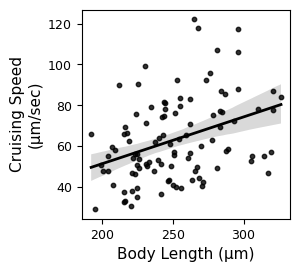

In [31]:
'''length vs. speed'''

lengths = path_summaries_df['Body Length (µm)'].values
cruising_speed_mm = path_summaries_df['Speed (µm/sec cruising)'].values
xlab = 'Body Length (µm)'
ylab ='Cruising Speed\n(µm/sec)'

f = plt.figure(figsize=(2.61,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = scat(ax,lengths,cruising_speed_mm,xlab,ylab)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

Raw p 0.00039492590743541665
Body Size (µm$^2$) vs. Cruising Speed
(µm/sec) ρ = 0.343, p =  0.0
n = 103


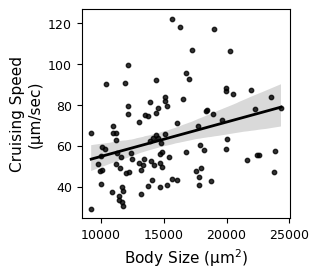

In [32]:
'''Area vs Speed'''

areas = path_summaries_df['Body Size (µm^2)'].values
cruising_speed_mm = path_summaries_df['Speed (µm/sec cruising)'].values
xlab = 'Body Size (µm$^2$)'
ylab = 'Cruising Speed\n(µm/sec)'

f = plt.figure(figsize=(2.61,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = scat(ax,areas,cruising_speed_mm,xlab,ylab)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

Raw p 0.7694037370132115
Body Size (µm$^2$) vs. Cruising Speed
(bodylength/sec) ρ = -0.029, p =  0.769
n = 103


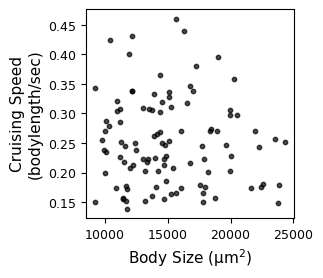

In [33]:
'''Area vs Normalized Speed'''

areas = path_summaries_df['Body Size (µm^2)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values
xlab = 'Body Size (µm$^2$)'
ylab = 'Cruising Speed\n(bodylength/sec)'

f = plt.figure(figsize=(2.61,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = scat(ax,areas,cruising_speed_bodylength,xlab,ylab)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

Raw p 0.9797090608208162
Body Length (µm) vs. Cruising Speed
(bodylength/sec) ρ = -0.003, p =  0.98
n = 103


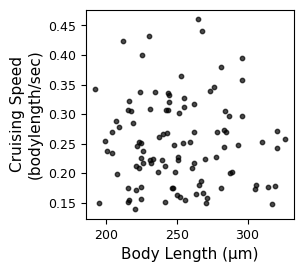

In [34]:
'''Length vs. Normalized speed'''

lengths = path_summaries_df['Body Length (µm)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values
xlab = 'Body Length (µm)'
ylab = 'Cruising Speed\n(bodylength/sec)'

f = plt.figure(figsize=(2.61,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = scat(ax,lengths,cruising_speed_bodylength,xlab,ylab)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

Raw p 0.00013061994919423371
Width:Length Ratio vs. Cruising Speed
(bodylength/sec) ρ = -0.368, p =  0.0
n = 103


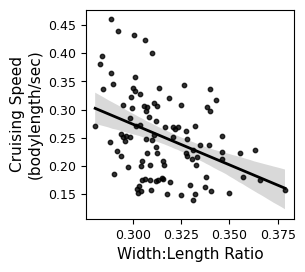

In [35]:
'''width:length ratio vs. Normalized speed '''

ratios = path_summaries_df['Body Width/Length Ratio'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values
xlab = 'Width:Length Ratio'
ylab = 'Cruising Speed\n(bodylength/sec)'

f = plt.figure(figsize=(2.61,2.61))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax = scat(ax,ratios,cruising_speed_bodylength,xlab,ylab)
ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.show()

# Put Whole Figure Together

Raw p 2.235408064559326e-39
Body Length (µm) vs. Body Width (µm) ρ = 0.905, p =  0.0
n = 103
... getting first frame ...
... getting last frame ...
Last successful frame = 503
Percentage Sustained Walking = 91.0
Raw p 0.9797090608208162
Body Length (µm) vs. Walking Speed
(bodylength/sec) ρ = -0.003, p =  0.98
n = 103
Raw p 0.00013061994919423371
Width:Length Ratio vs. Walking Speed
(bodylength/sec) ρ = -0.368, p =  0.0
n = 103


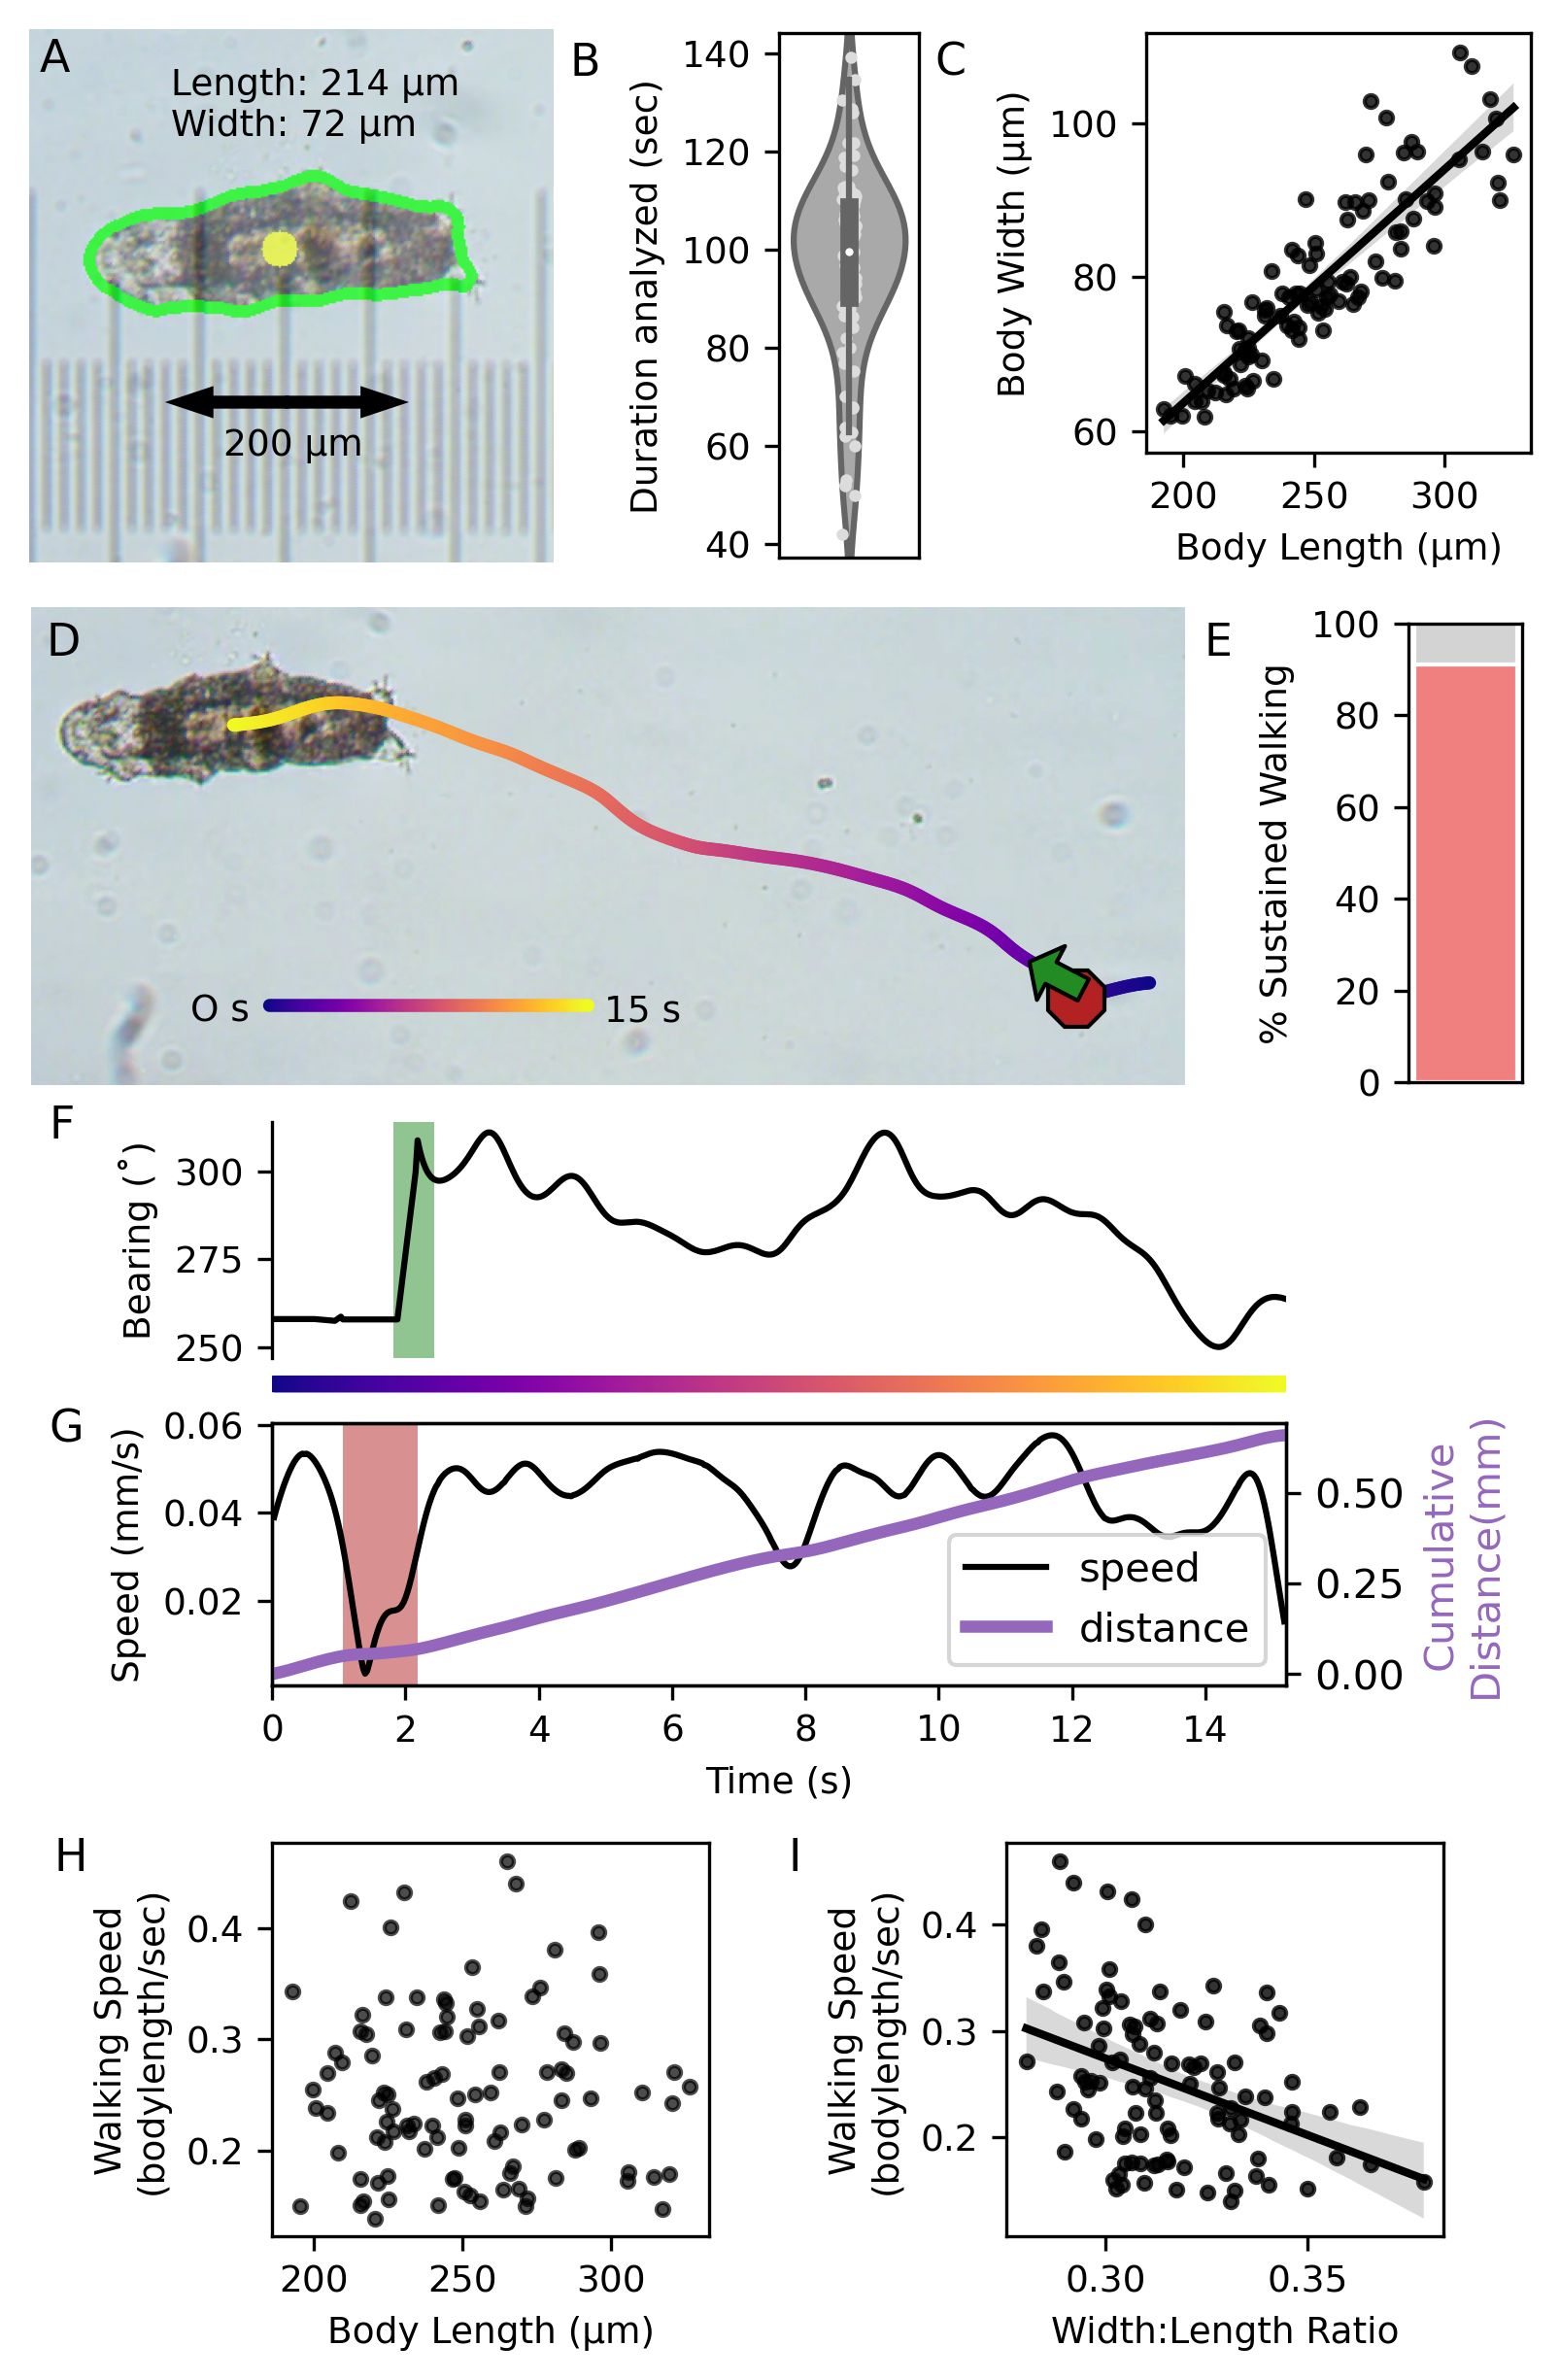

In [36]:
'''
tardigradeSize(ax,im) ... lengthVWidth(ax,path_summaries_df)
trackingExample(ax,im,addStopsTurns=True) ... cruise(ax)
nSpeedVLength(ax) ... nSpeedVRatio(ax)
'''
f = plt.figure(figsize=(6,9),dpi=300)
tracked_df = pd.read_excel(excel_filename, sheet_name='pathtracking', index_col=None)
path_stats = gaitFunctions.loadPathStats(movie_file)
scale = float(path_stats['scale'])
unit = path_stats['unit']
last_frame = tracked_df.times.values[-1]

# set up axes positions
size_ax = f.add_axes(     [0.061, 0.73,0.3,  0.22])
durations_ax = f.add_axes([0.49, 0.74,0.08, 0.20])
lw_ax = f.add_axes(       [0.7, 0.78,0.22, 0.16])

track_ax = f.add_axes(    [0.062,0.51,0.66, 0.24])
cruise_ax = f.add_axes(   [0.85, 0.54,0.065,0.175])

bearing_ax = f.add_axes(   [0.2, 0.435, 0.58, 0.09])
timeribbon_ax = f.add_axes([0.2, 0.38,  0.58, 0.09])
speed_ax = f.add_axes(     [0.2, 0.31,  0.58, 0.10])


nsvl_ax = f.add_axes(     [0.2, 0.1,0.25,0.15]) # scatter of length vs normalized speed
nsvr_ax = f.add_axes(     [0.62,0.1,0.25,0.15]) # scatter of width:length vs normalized speed

# show tardigrade with scale bar and size annotations
size_ax=tardigradeSize(size_ax,im)
size_ax.annotate('A', xy=(0.02, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

# box plot of durations analyzed
durations_ax = gaitFunctions.singleViolinPoints(durations_ax, 
                                           path_summaries_df, 
                                           'Duration analyzed (sec)', box=True,
                                               vcolor='darkgray',pointcolor='gainsboro')
durations_ax.annotate('B', xy=(-1.5, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

# scatter plot of length vs. width
lw_ax=scat(lw_ax,lengths,widths,'Body Length (µm)','Body Width (µm)')
lw_ax.annotate('C', xy=(-0.55, 0.90), xycoords='axes fraction', fontsize=axis_fontsize)

# tracking example
track_ax=trackingExample(track_ax,im,True)
track_ax.annotate('D', xy=(0.013, 0.90), xycoords='axes fraction', fontsize=axis_fontsize)

# percentage cruising
cruise_ax = cruise(cruise_ax, tracked_df)
cruise_ax.annotate('E', xy=(-1.8, 0.93), xycoords='axes fraction', fontsize=axis_fontsize)

# bearing change plot
bearing_ax = plotClip.bearingChangePlot(bearing_ax, tracked_df)
xlim = [0,last_frame]
bearing_ax.set_xlim(xlim)
bearing_ax.annotate('F', xy=(-0.22, 0.93), xycoords='axes fraction', fontsize=axis_fontsize)

# time ribbon plot
timeribbon_ax = plotClip.timeRibbonPlot(timeribbon_ax, tracked_df)
timeribbon_ax.axis('off')
timeribbon_ax.set_xlim(xlim)


# speed and cumulative distance plot
speed_ax, distax = plotClip.speedDistancePlot(speed_ax, tracked_df, scale, unit)
distax.yaxis.label.set_text('Cumulative\nDistance(mm)')
speed_ax.set_xlim(xlim)
speed_ax.annotate('G', xy=(-0.22, 0.93), xycoords='axes fraction', fontsize=axis_fontsize)

# scatter plots
nsvl_ax = scat(nsvl_ax,lengths,cruising_speed_bodylength,'Body Length (µm)','Walking Speed\n(bodylength/sec)')
nsvl_ax.annotate('H', xy=(-0.5, 0.93), xycoords='axes fraction', fontsize=axis_fontsize)
nsvr_ax = scat(nsvr_ax,ratios,cruising_speed_bodylength,'Width:Length Ratio','Walking Speed\n(bodylength/sec)')
nsvr_ax.annotate('I', xy=(-0.5, 0.93), xycoords='axes fraction', fontsize=axis_fontsize)

# adjust axis parameters
for ax in [size_ax, durations_ax, lw_ax, track_ax, cruise_ax, 
           bearing_ax, timeribbon_ax, speed_ax,  nsvl_ax, nsvr_ax]:
    ax.xaxis.label.set_size(tick_fontsize)
    ax.yaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

Raw p 0.00011403055282636744
Body Length (µm) vs. Walking Speed
(µm/sec) ρ = 0.371, p =  0.0
n = 103
Raw p 0.00039492590743541665
Body Size (µm$^2$) vs. Walking Speed
(µm/sec) ρ = 0.343, p =  0.0
n = 103
Raw p 0.7694037370132115
Body Size (µm$^2$) vs. Walking Speed
(bodylength/sec) ρ = -0.029, p =  0.769
n = 103


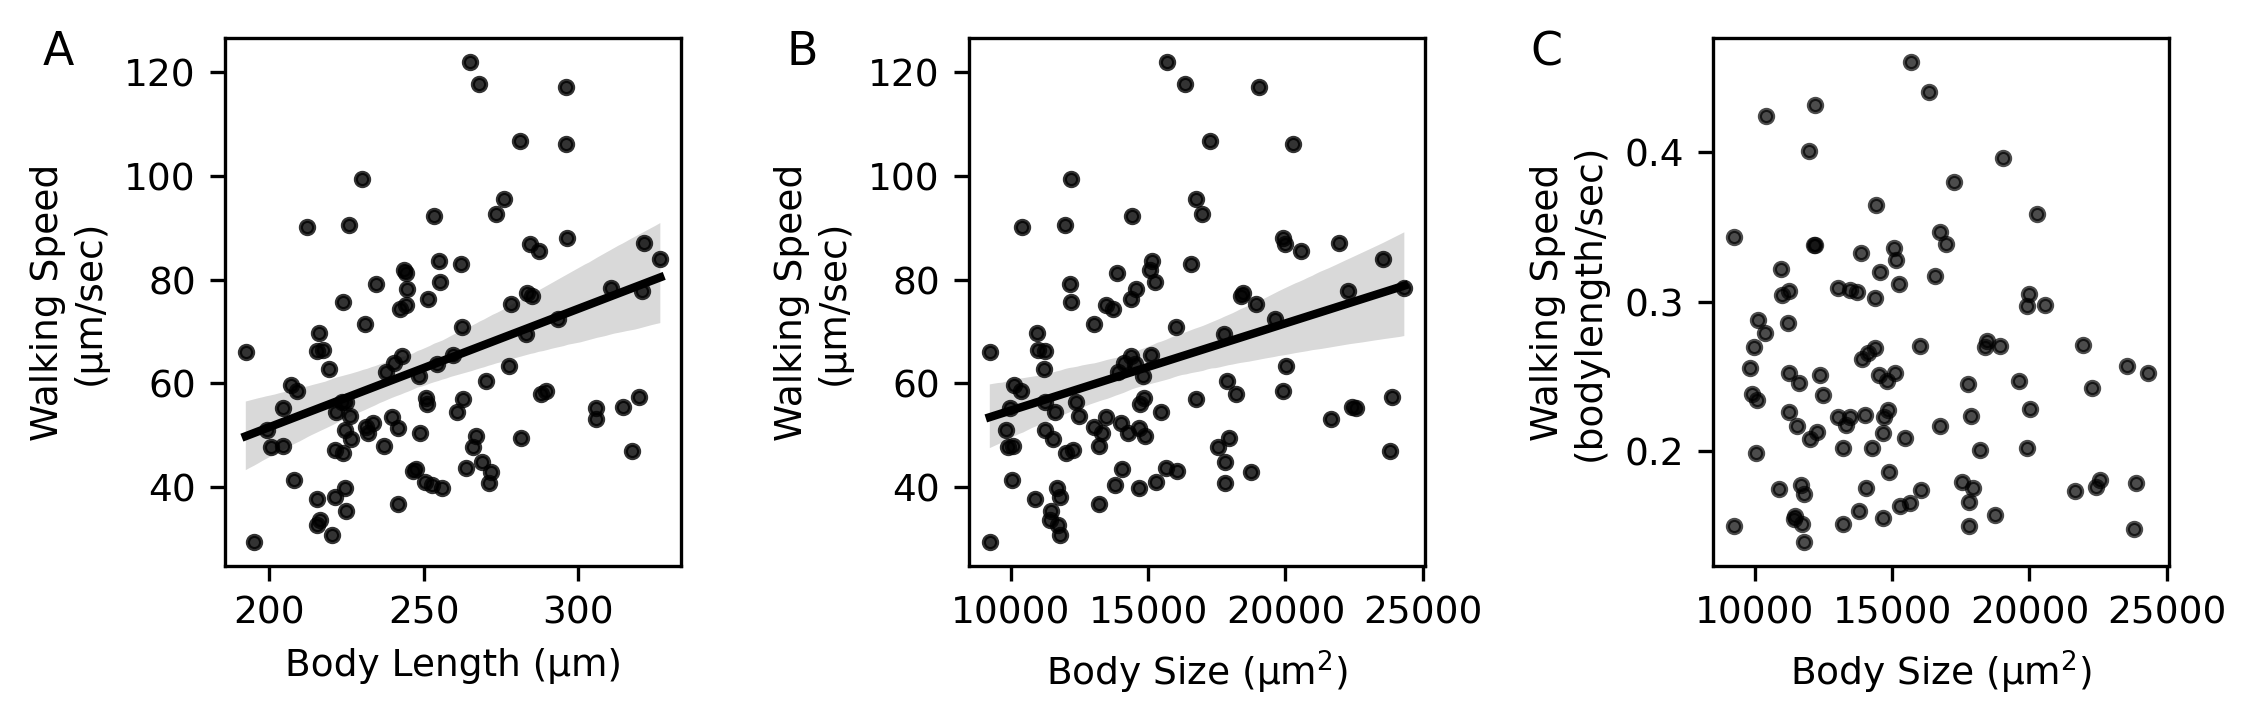

In [37]:
'''
supplemental fig
speedVLength(ax) ... speedVArea(ax) ... nSpeedVArea(ax)
'''
f=plt.figure(figsize=(8,2.2),dpi=300)
svl_ax = f.add_axes([0.1,0.1,0.19,0.8])
svl_ax = scat(svl_ax,lengths,cruising_speed_mm,'Body Length (µm)','Walking Speed\n(µm/sec)')
sva_ax = f.add_axes([0.41,0.1,0.19,0.8])
sva_ax = scat(sva_ax,areas,cruising_speed_mm,'Body Size (µm$^2$)','Walking Speed\n(µm/sec)')
nsva_ax = f.add_axes([0.72,0.1,0.19,0.8])
nsva_ax = scat(nsva_ax,areas,cruising_speed_bodylength,'Body Size (µm$^2$)','Walking Speed\n(bodylength/sec)')

# try adding letter labels!
label_text = ['A','B','C']

for i, ax in enumerate([svl_ax, sva_ax, nsva_ax]):
    ax.annotate(label_text[i], xy=(-0.4, 0.95), xycoords='axes fraction', fontsize=axis_fontsize)
    ax.xaxis.label.set_size(tick_fontsize)
    ax.yaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# More About Tardigrade Size
### Nirody figure 1A, 1B

In [38]:
'''
Nirody figure 1A, 1B ... tardigrade size
they report body length 350.40 ± 46.04 (standard deviation)
n = 43 tardigrades

the tardigrade they show in 1B looks like a young one, with no eggs . . . 
but ours are smaller? See confirmation of size measurements a few cells down.

Also see 'tardigrade size check' folder in analyses_summaries
''' 

# load the path summaries data into a dataframe
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries')
path_df = pd.read_excel(excel_file, sheet_name='path_summaries', index_col=None)
num_tardigrades = len(path_df.individual.values)
body_lengths = path_df['Body Length (mm)'].values * 1000
body_length = np.round(np.mean(body_lengths),2)
body_length_sd = np.round(np.std(body_lengths),2)

print('n = ' + str(num_tardigrades) + ' tardigrades')
print('body length = ' + str(body_length) + ' ± ' + str(body_length_sd) + ' µm')


n = 103 tardigrades
body length = 251.53 ± 32.25 µm


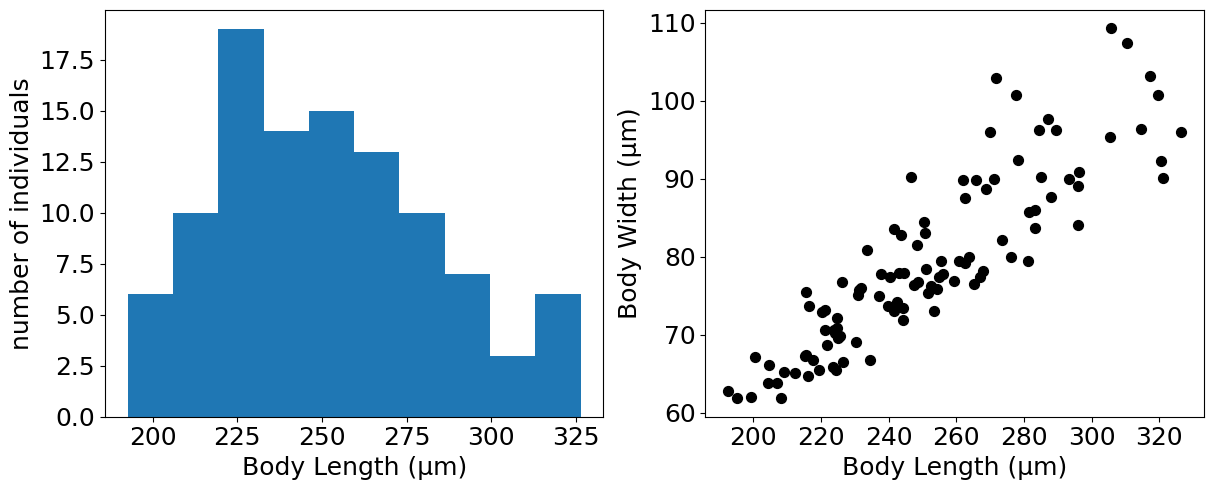

In [39]:
# more about size ... 
f,(a1,a2) = plt.subplots(1,2,figsize=(12,5))
a1.hist(body_lengths)
a1.set_ylabel('number of individuals',fontsize=18)
a1.set_xlabel('Body Length (µm)', fontsize=18)
a1.tick_params(axis='x', labelsize=18)
a1.tick_params(axis='y', labelsize=18)
body_widths = path_df['Body Width (mm)'].values * 1000
a2.scatter(body_lengths,body_widths,s=50,c='k')
a2.set_ylabel('Body Width (µm)',fontsize=18)
a2.set_xlabel('Body Length (µm)',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.tight_layout()
plt.show()

# Checking size differences
Sizes are different between Nirody paper and our analyses ... <br>

Summary of analysis below - if our pix-per-mm 'scales' are correct (and they seem to be), our sizes are correct.

Re-check our size measurements: <br>

On images from the Amscope inverted scope with MD310B camera, capturing images at 1024x768.<br>
Measuring micrometer via Python = <br>
* about 957 pixels (956 on 8 Dec, 948 on 12 Dec, 957 on 14 Dec, 958 on 30 Jan, 955 on 1 Feb)<br>
* Confirmed these values on Preview app, Confirmed on FIJI<br><br>

Selected three tardigrades from 9Nov23 (AmScope) <br>
to measure pixels in FIJI and compare to PYTHON-calculated values:<br>
* iw_9Nov_tardigrade01_exemplaris_033-060_first  145 pix = 151.67 µm (FIJI) vs. 155.98 µm (path_stats)
* iw_9Nov_tardigrade02_exemplaris_080-087_first  230 pix = 240.58 µm (FIJI) vs. 253.72 µm (path_stats)
* iw_9Nov_tardigrade04_exemplaris_097-117_first  261 pix = 273.01 µm (FIJI) vs. 280.70 µm (path_stats)
<br>

On images from the Te-Wen inverted scope with Te-Wen camera, capturing images at 1920x1080.<br>
Measuring micrometer via Python = <br>
* about 1633 pixels (1637 in adults_15Sep, 1631 in babies_15Sep, 1633 in adults_28Nov)
* Confirmed these values on Preview app, Confirmed on FIJI<br><br>

Selected three tardigrades from 28Nov23 (Te-Wen Scope and camera) <br> 
to measure pixels in FIJI and compare to PYTHON-calculated values:<br>
* ea_16jul_tardigrade37A-day4_050-068_first  229.12 pix = 140.30 µm (FIJI) vs. 144.04 µm (path_stats)
* ea_28nov_exemplaris_tardigrade15_027-035_first  497.29 pix = 304.52 µm (FIJI) vs. 289.14 µm (path_stats)
* gi_15sep_tardigrade8_041-070_first  341.71 pix = 209.25 µm (FIJI) vs. 201.17 µm (path_stats)